# ***Apple Stock Price Predcistion Using LSTM***

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:
pip install yfinance


In [3]:
import yfinance as yf

# Fetch data for AAPL from Yahoo Finance
df = yf.download("AAPL", start="2012-01-01", end="2019-12-17")
df


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2012-01-03 00:00:00+00:00,12.388997,14.686786,14.732143,14.607143,14.621429,302220800
2012-01-04 00:00:00+00:00,12.455579,14.765714,14.810000,14.617143,14.642857,260022000
2012-01-05 00:00:00+00:00,12.593857,14.929643,14.948214,14.738214,14.819643,271269600
2012-01-06 00:00:00+00:00,12.725512,15.085714,15.098214,14.972143,14.991786,318292800
2012-01-09 00:00:00+00:00,12.705326,15.061786,15.276786,15.048214,15.196429,394024400
...,...,...,...,...,...,...
2019-12-10 00:00:00+00:00,65.071693,67.120003,67.517502,66.464996,67.150002,90420400
2019-12-11 00:00:00+00:00,65.626694,67.692497,67.775002,67.125000,67.202499,78756800


In [4]:
df.shape

(2002, 6)

Text(0, 0.5, 'Close Price USD ($)')

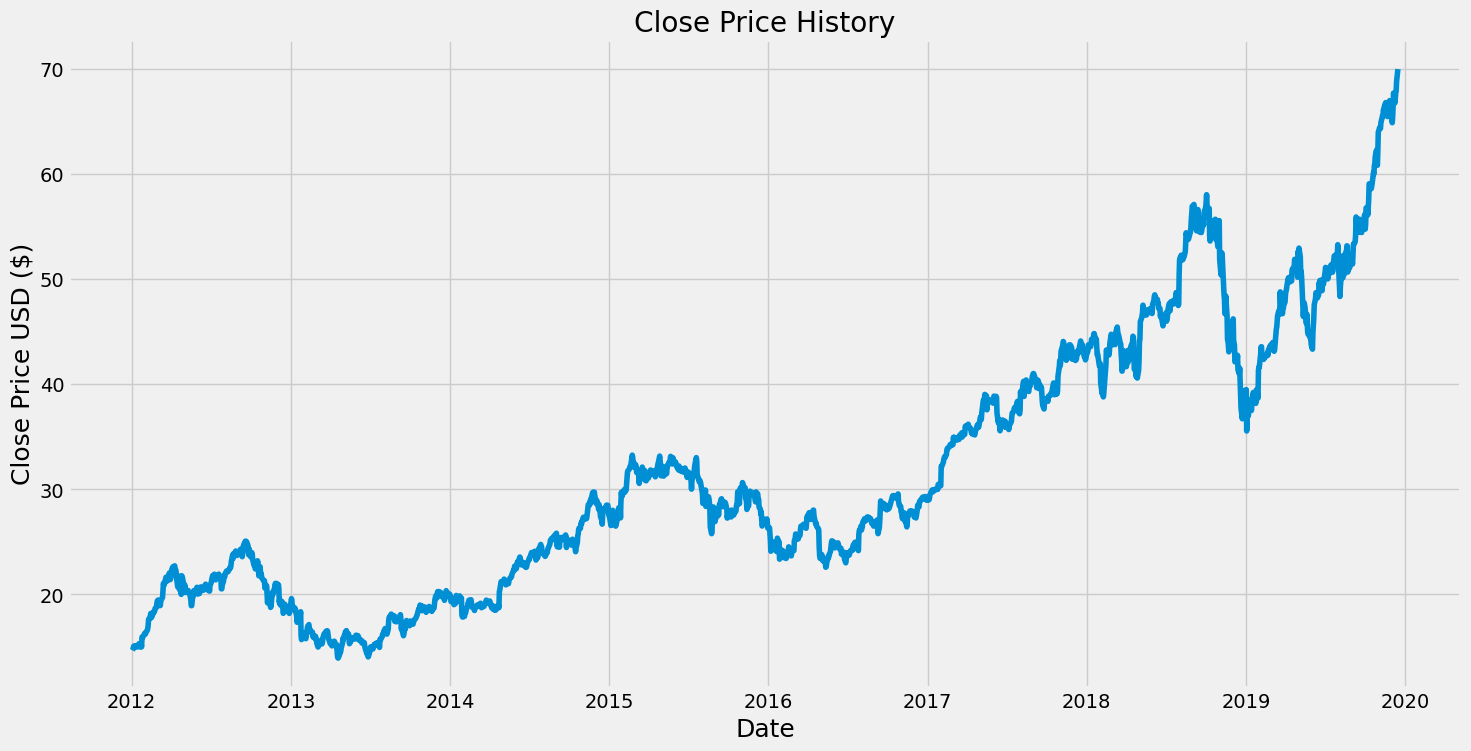

In [5]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

In [6]:
# Simplify MultiIndex columns to make them easier to work with
df.columns = [col[0] for col in df.columns]  # Use only the 'Price' level
df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2012-01-03 00:00:00+00:00,12.388997,14.686786,14.732143,14.607143,14.621429,302220800
2012-01-04 00:00:00+00:00,12.455579,14.765714,14.810000,14.617143,14.642857,260022000
2012-01-05 00:00:00+00:00,12.593857,14.929643,14.948214,14.738214,14.819643,271269600
2012-01-06 00:00:00+00:00,12.725512,15.085714,15.098214,14.972143,14.991786,318292800
2012-01-09 00:00:00+00:00,12.705326,15.061786,15.276786,15.048214,15.196429,394024400


In [7]:
# Select the "Close" column
data = df[["Close"]]
data.head()


,Close
Date,
2012-01-03 00:00:00+00:00,14.686786
2012-01-04 00:00:00+00:00,14.765714
2012-01-05 00:00:00+00:00,14.929643
2012-01-06 00:00:00+00:00,15.085714
2012-01-09 00:00:00+00:00,15.061786


In [8]:
# Convert to numpy array
dataset = data.values

# Calculate the training data length
training_data_len = math.ceil(len(dataset) * 0.8)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Display results
print(f"Training data length: {training_data_len}")
print(f"Scaled data (first 5 rows): \n{scaled_data[:5]}")

Training data length: 1602
Scaled data (first 5 rows): 
[[0.0131974 ]
 [0.01460639]
 [0.01753278]
 [0.0203189 ]
 [0.01989174]]


In [9]:
# create the training data set
# create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# split the data in to x_train and y_train datasets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()


[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.01898002, 0.02351306, 0.01905016,
       0.03578601, 0.03449178, 0.0361813 , 0.03983449, 0.0420468 ,
       0.04186191, 0.04117973, 0.04408699, 0.04682209, 0.04992063,
       0.05492545, 0.06543874, 0.06559812, 0.0714509 , 0.07582451,
       0.06830775, 0.07120224, 0.07114487, 0.07926096, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.0923691 , 0.0968511 ,
       0.09814534, 0.09859802, 0.09093461, 0.08908567, 0.08935984,
       0.09656423, 0.09859166, 0.10294617, 0.1132108 , 0.12690551,
       0.12434252, 0.12434889, 0.13425015, 0.13734869, 0.13514271,
       0.13312806, 0.13103049, 0.13799896, 0.14278065, 0.14478257])]
[0.139835129205152]

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.0189

In [10]:
# converting the x_train & y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
# Reshapping the Data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))    #(samples, time_steps, features)
x_train.shape

(1542, 60, 1)

In [12]:
# Building the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# Compiling the Model

model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
# Training the model

model.fit(x_train, y_train, batch_size=1, epochs=1)

1542/1542 ━━━━━━━━━━━━━━━━━━━━ 56s 31ms/step - loss: 0.0017


In [15]:
# Creating the testing dataset
# Creating a new array containing scaled values from index 1543 to 2003

test_data = scaled_data[training_data_len - 60: , :]
# creating a datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [16]:
# converting the data to a anumpy array

x_test = np.array(x_test)


In [17]:
# Reshaping the data

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [18]:
# Get the model's predicted price vale

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [19]:
# Getting the root mean squared error(RMSE)

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.4447262191772461

<ipython-input-20-8190668c7fe9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


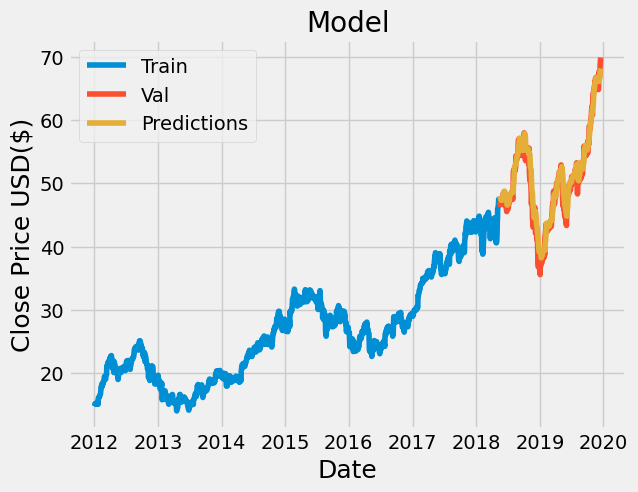

In [20]:
# Plotting the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualizing the data

plt.figure(figure=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

In [21]:
# Valid and Predicted prices

valid

,Close,Predictions
Date,,
2018-05-16 00:00:00+00:00,47.044998,48.016548
2018-05-17 00:00:00+00:00,46.747501,47.946087
2018-05-18 00:00:00+00:00,46.577499,47.796043
2018-05-21 00:00:00+00:00,46.907501,47.594742
2018-05-22 00:00:00+00:00,46.790001,47.452545
...,...,...
2019-12-10 00:00:00+00:00,67.120003,66.782471
2019-12-11 00:00:00+00:00,67.692497,67.064240
2019-12-12 00:00:00+00:00,67.864998,67.410316


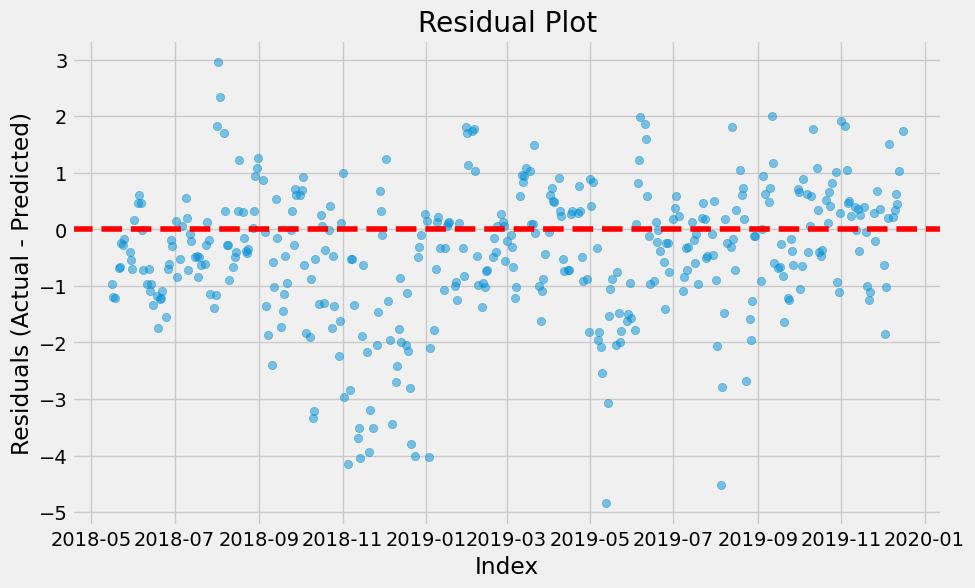

In [22]:
# Calculate residuals
residuals = valid['Close'] - valid['Predictions']

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(valid.index, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Index')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()


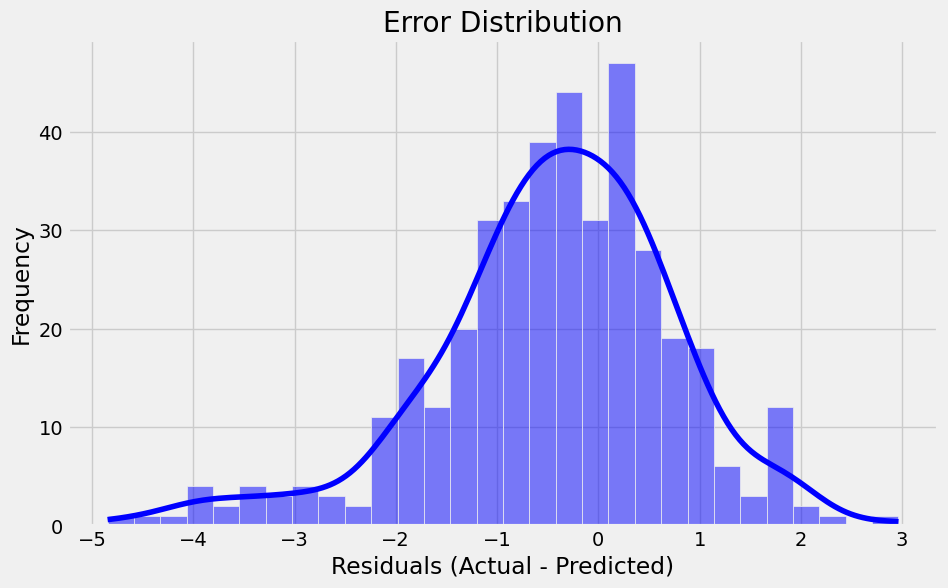

In [23]:
import seaborn as sns

# Plot error distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title('Error Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


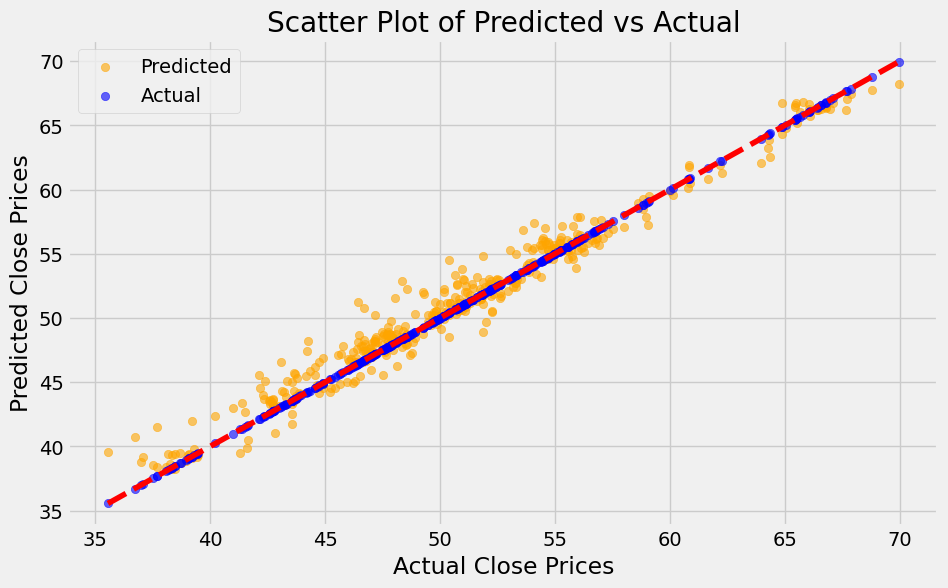

In [26]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(valid['Close'], valid['Predictions'], alpha=0.6, color='orange', label='Predicted')
plt.scatter(valid['Close'], valid['Close'], alpha=0.6, color='blue', label='Actual')
plt.plot([valid['Close'].min(), valid['Close'].max()],
         [valid['Close'].min(), valid['Close'].max()], color='red', linestyle='--')  # Perfect match line
plt.title('Scatter Plot of Predicted vs Actual')
plt.xlabel('Actual Close Prices')
plt.ylabel('Predicted Close Prices')
plt.legend()
plt.show()


# Predicting Apple's stock price for December 18, 2019

In [27]:
# Downloading historical data till 17th December 2019
data_new = yf.download("AAPL", start="2012-01-01", end="2019-12-17")
new_df = data_new[["Close"]]

# Scaling the last 60 days of data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(new_df.values)  # Fitting scaler to the entire dataset
last_60_days = new_df[-60:].values  # Last 60 rows
last_60_days_scaled = scaler.transform(last_60_days)  # Scaling the data

# Preparing the test input
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predicting the price
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)  # Reverse scaling
print("Predicted Price for 2019-12-18:", pred_price[0][0])

# Downloading the actual price for 18th December 2019
data_new_1 = yf.download("AAPL", start="2019-12-18", end="2019-12-19")

# Check if data exists
if not data_new_1.empty:
    actual_price = data_new_1["Close"].values[0]
    print("Actual Price for 2019-12-18:", actual_price)
else:
    print("Data not available for 2019-12-18.")


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step



[*********************100%***********************]  1 of 1 completed

Predicted Price for 2019-12-18: 68.88362
Actual Price for 2019-12-18: [69.93499756]


The model predicted Apple's stock price for December 18, 2019, as **68.88 USD**, while the actual closing price was **69.93 USD**, showing a close match between prediction and reality.